# Laboratorio 02

In [4]:
import numpy as np
import skimage as sk
from matplotlib import pyplot as plt
import cv2 as cv

In [19]:
image_name = "person.png"

In [13]:
image = cv.imread(f'images/{image_name}', cv.IMREAD_GRAYSCALE)
# Convert to numpy array
image = np.array(image) / 255.0

array([[0.38431373, 0.39607843, 0.41176471, ..., 0.29411765, 0.38823529,
        0.50196078],
       [0.30196078, 0.31764706, 0.33333333, ..., 0.19215686, 0.29803922,
        0.42745098],
       [0.21960784, 0.23921569, 0.25490196, ..., 0.09411765, 0.21176471,
        0.35686275],
       ...,
       [0.7254902 , 0.7254902 , 0.7254902 , ..., 0.54509804, 0.6       ,
        0.66666667],
       [0.74901961, 0.74901961, 0.74901961, ..., 0.56470588, 0.61568627,
        0.6745098 ],
       [0.78431373, 0.78431373, 0.78431373, ..., 0.6       , 0.64313725,
        0.69803922]])

## Inciso 1

In [26]:
def resize_image(image, k = 1):
		# (128k, 64k) is the new size of the image
		new_size = (int(128 * k), int(64 * k))
		# Resize the image
		image = sk.transform.resize(image, new_size, anti_aliasing=True)
		return image



In [24]:
resized_image = resize_image(image, 1)


## Inciso 2

In [49]:
from scipy.ndimage import convolve

def prewitt_operator(grayscale_image):
    # Kernels Perwitt
    Gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    Gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    # Compute the gradient in the x and y directions
    grad_x = convolve(grayscale_image, Gx)
    grad_y = convolve(grayscale_image, Gy)
    
    # Compute the gradient magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    # Compute the gradient direction (angle)
    angle = np.arctan2(-grad_y, grad_x) * (180 / np.pi)
    # Ensure the angle is within 0 to 180 degrees
    angle[angle < 0] += 180
    angle = angle % 180
    
    return magnitude, angle

In [50]:
magnitude, angle = prewitt_operator(resized_image)


In [58]:
def generate_magnitude_and_angle_for_image(image_name, k=1):
		image = cv.imread(f'images/{image_name}', cv.IMREAD_GRAYSCALE)
		# Convert to numpy array
		image = np.array(image) / 255.0
		resized_image = resize_image(image, k)
		magnitude, angle = prewitt_operator(resized_image)
		return magnitude, angle


In [67]:
magnitude, angle = generate_magnitude_and_angle_for_image(image_name, 2)

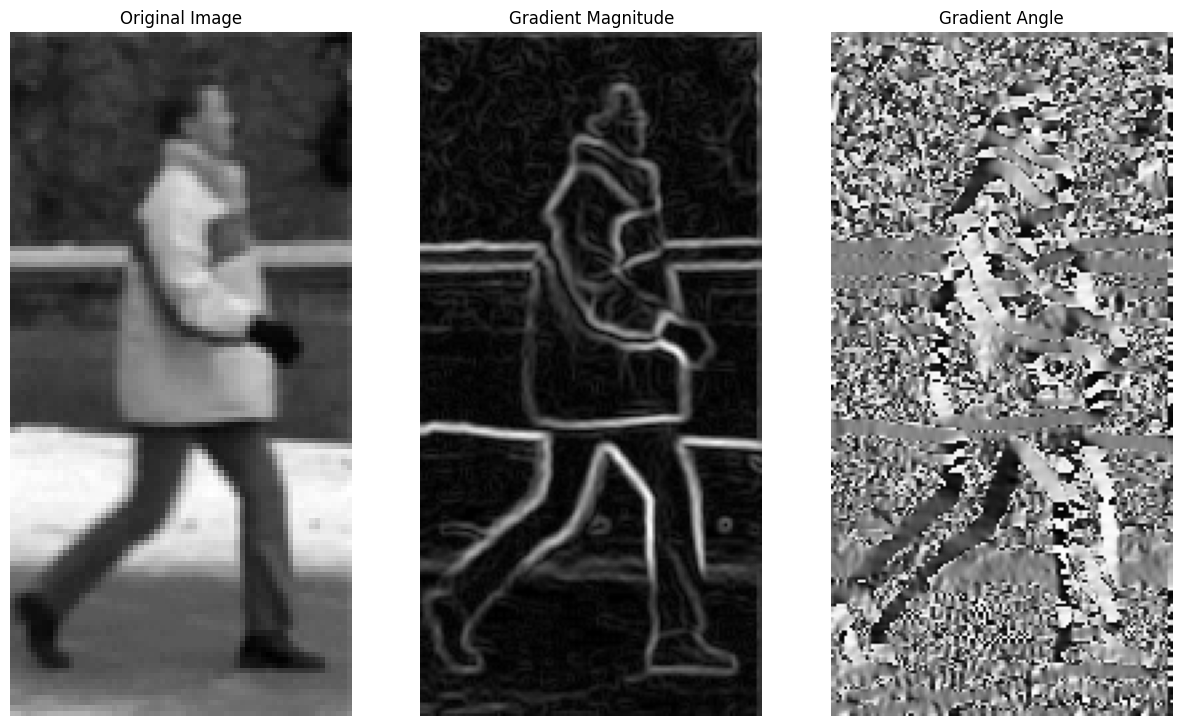

In [68]:
# Create a figure to display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()
ax[0].imshow(resized_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(magnitude, cmap='gray')
ax[1].set_title('Gradient Magnitude')
ax[1].axis('off')
ax[2].imshow(angle, cmap='gray')
ax[2].set_title('Gradient Angle')
ax[2].axis('off')
plt.axis('off')
plt.show()